<a href="https://colab.research.google.com/github/baricio00/Health-Informatics-2025-26/blob/main/Copy_of_Lab_I_SMHD_25_26_TBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<font size="6">Statistical Models for Healthcare Data</font>**

**<font size="5">MSc in Health Informatics - UniSR - A.Y. 2025-2026</font>**

Prof. Lara Cavinato - Dott. Vittorio Torri

---

<font size="4">Lab I - Descriptive Statistics</font>

# Dataset info

Modified version of the dataset published in https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001

Data about 299 heart failure patients who were admitted to Institute of Cardiology and Allied hospital Faisalabad-Pakistan during April-December 2015.

**Dataset variables**

Age : age [years]

anaemia : Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)

diabetes : If the patient has diabetes (boolean)

ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure : If the patient has hypertension (boolean)

platelets : Platelets in the blood (kiloplatelets/mL)

serum_creatinine : Level of serum creatinine in the blood (mg/dL)

serum_sodium : Level of serum sodium in the blood (mEq/L)

sex : Woman or man (binary)

smoking : If the patient smokes or not (boolean)

bmi: body mass index (float)

time : Follow-up period (days)

DEATH_EVENT : If the patient deceased during the follow-up period (boolean)

# Libraries

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
PATH = '/content/drive/MyDrive/'
df = pd.read_csv(PATH + 'heart_failure_clinical_records_dataset_smhd.csv')

In [ ]:
df

In [ ]:
type(df)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
# TODO

Why these variables matter in cardiology

Each variable in this dataset reflects an important clinical dimension of heart failure management:
- **Age**: heart failure is more common and severe in older patients.  
- **Anaemia**: reduced oxygen-carrying capacity can worsen heart failure symptoms.  
- **Ejection fraction (EF)**: the key indicator of how well the heart pumps blood; low EF signals poor cardiac function.  
- **Creatinine and sodium**: markers of kidney function and electrolyte balance, both strongly linked to prognosis.  
- **Blood pressure, diabetes, smoking**: classic cardiovascular risk factors that influence outcomes.  
- **BMI**: relates to metabolic status and overall cardiovascular risk.  
- **DEATH_EVENT**: the endpoint we are ultimately interested in — whether the patient survived during follow-up.  

By exploring the distributions and relationships of these variables, we begin to see how simple statistics can already highlight clinical patterns and risk factors in heart failure patients.


# Descriptive statistics

## Categorical variables

In [ ]:
df['diabetes']

In [ ]:
type(df['diabetes'])

### Frequencies

Absolute frequencies - How many patients have diabetes?

In [ ]:
df['diabetes'].value_counts()

Relative frequencies - What is the percentage of patients with diabetes?

In [ ]:
df['diabetes'].value_counts(normalize=True)

Joint (absolute) frequencies - How many patients have diabetes and anaemia?

In [ ]:
df[['diabetes', 'anaemia']]

In [ ]:
type(df[['diabetes', 'anaemia']])

In [ ]:
df[['diabetes', 'anaemia']].value_counts()

In [ ]:
df[['diabetes', 'anaemia']].value_counts(normalize=True)

In [ ]:
# Access a specific value from the frequency table
df[['diabetes', 'anaemia']].value_counts(normalize=True)[0,1]

Unique values of a variable - What are the possible values for the anaemia variable?

In [ ]:
df['anaemia'].unique()

How many unique values has the anaemia variable?

In [ ]:
df['anaemia'].nunique()

### Barplots

How to graphically show the distribution of a categorical variable?

In [ ]:
sns.countplot(data=df, x='anaemia')

In [ ]:
colors = ['#baddf5', '#cc2b2b']

In [ ]:
cat_vars = {"anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"}
num_vars = {"age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time", "bmi"}

In [ ]:
ax = sns.countplot(data=df, x='anaemia', palette=colors, hue='anaemia', legend=False)
ax.set_title('Barplot anaemia')

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (13,10))

ax = ax.flatten()

cat_vars_list = list(cat_vars) # Convert the set to a list

for i in range(len(cat_vars_list)):
    sns.countplot(data=df, x=cat_vars_list[i], palette=colors, hue=cat_vars_list[i], legend=False, ax=ax[i])
    title = cat_vars_list[i]
    ax[i].set_title(title)
plt.tight_layout() #avoid overlap among subplots
plt.show()

Barplot grouping by another categorical variable

In [ ]:
sns.countplot(data=df, x='DEATH_EVENT', palette=colors, hue='high_blood_pressure')

In [ ]:
sns.countplot(data=df, x='high_blood_pressure', palette=colors, hue='DEATH_EVENT')

Pie chart

In [ ]:
death_counts = df['DEATH_EVENT'].value_counts()

plt.pie(death_counts,
        labels=death_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
        )
plt.title('DEATH_EVENT Distribution')
plt.show()

## Numerical variables

### Univariate statistics

The *describe* method of Pandas dataframe computes mean, standard deviation, min, max and quantiles, that are the most relevant descriptive statistics for a numerical variable

In [ ]:
df[list(num_vars)].describe()

The median is the 50th quantile, but can also be retrieved via the *median* method:

In [ ]:
df['ejection_fraction'].median()

What if we want to access to some of the values included in the *describe* method output?

In [ ]:
print(df['ejection_fraction'].mean())
print(df['ejection_fraction'].std())
print(df['ejection_fraction'].var())
print(df['ejection_fraction'].min())
print(df['ejection_fraction'].max())
print(df['ejection_fraction'].quantile(0.75))

Range:

In [ ]:
r = df['ejection_fraction'].max() - df['ejection_fraction'].min()
print(r)

Interquartile Range (IQR):

In [ ]:
iqr = df['ejection_fraction'].quantile(0.75) - df['ejection_fraction'].quantile(0.25)
print(iqr)

#### Histograms

What does the distribution of our numerical variables look like?

Histograms with kernel density estimation

In [ ]:
nrows = 4
ncols = 2

num_vars_list = list(num_vars)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize = (10,25))
for i in range(len(num_vars_list)):

    ax = axs[i // ncols, i % ncols] # different notation to access ax as matrix if you don't flatten it

    #plt.subplot(nrows, ncols, i+1) # if you don't set the ax in the parameter of histplot you can set it in this way

    #sns.distplot(df[num_vars[i]]) # deprecated function for histograms

    sns.histplot(
      data=df,
      x=num_vars_list[i],
      kde=True,
      alpha=.4, # change opacity of the bars
      edgecolor=(1, 1, 1), # change color of the border of the bars (here set white)
      ax=ax
    )

    title = 'Distribution : ' + num_vars_list[i]
    ax.set_title(title)

plt.show()

In [ ]:
# TODO experiment with different bin strategies on the first histogram

If you are curious about the default binning strategy, read [here](https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html) or [here](https://github.com/numpy/numpy/blob/main/numpy/lib/_histograms_impl.py#L230) for the precise source code

#### Kurtosis and skeweness

Skeweness is a measure of the asymmetry of a distribution

$$
skeweness = 3 \cdot \frac{mean - median}{std}
$$


skeweness > 0 ==> right skew

skeweness < 0 ==> left skew

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur.

There are various formulas to estimate it from a sample of data. The kurtosis method of scipy.stats with default parameters returns the "Excess kurtosis", that is such that:

k > 0 (leptokurtic distribution) has fatter tails than gaussian

k < 0 (platykurtic distribution) has thinner tails than gaussian



In [ ]:
from scipy.stats import kurtosis, skew

# Create a list (of dictionaries) to store the results
results = []

for n in num_vars:
    k = kurtosis(df[n])
    s = skew(df[n])
    results.append({'variable': n, 'kurtosis': k, 'skewness': s})

# Convert the results list to a DataFrame
ks_df = pd.DataFrame(results)

ks_df

#### Boxplots

Another way to visualize the distribution of a numerical variable, highlighting its main statistics

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (10,25))
num_vars_list = list(num_vars) # Convert the set to a list
for i in range(len(num_vars)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df, y=num_vars_list[i])
    title = 'Distribution : ' + num_vars_list[i]
    plt.title(title)
plt.tight_layout()
plt.show()

### Bivariate and Multivariate Statistics

#### Numerical variable + categorical variable

Is there a difference in ejection fraction distribution between patients who died and patients who survived?

Histogram grouped by a categorical variable

In [ ]:
# TODO

What about serum creatinine?

Boxplot grouped by another variable (DEATH_EVENT)

In [ ]:
# TODO

#### Covariance Matrix

$$
Cov(x_i,x_j) = s_{ij} = \frac{1}{n-1}\sum_{k=1}^n (x_{k,i} - \bar{x_i})(x_{k,j}-\bar{x_j})
$$

Positive covariance: the variables increase together

Negative covariance: the variables decrease together

Cov is not bounded and it is influenced by the scale of variables, difficult to compare cov of different pairs of values

The covariance depends on the range of variance

In [ ]:
# Calculate the covariance matrix
cov_matrix = df[list(num_vars)].cov()

# Plot the covariance matrix as a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(cov_matrix, annot=True, cmap='Blues')

plt.title('Covariance Matrix Heatmap')
plt.show()

In [ ]:
cov_matrix

#### Correlation matrix
$$
\rho_{ij} = \frac{s_{ij}}{\sqrt{s_{ii}}\sqrt{s_{jj}}}
$$

Bounded in [-1,+1]

A value of +1 indicates a perfect positive linear relationship.

A value of -1 indicates a perfect negative linear relationship. (when one decreases, the other decreases)

A value of 0 indicates no linear relationship.

Easier to interpret and compare than covariance, but restricted to linear relationships

Which variables have a linear correlation?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Re-load df and re-define num_vars to ensure they are available
PATH = '/content/drive/MyDrive/'
df = pd.read_csv(PATH + 'heart_failure_clinical_records_dataset_smhd.csv')

cat_vars = {"anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"}
num_vars = {"age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time", "bmi"}

correlation_matrix = df[list(num_vars)].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.show()

#### Scatterplot

Is there a relationship between *bmi* and *ejection fraction*? Is it influenced by the death=

In [ ]:
sns.scatterplot(data=df, x='bmi', y='ejection_fraction')

Is it influenced by the death/survival?

In [ ]:
sns.scatterplot(data=df, x='bmi', y='ejection_fraction', hue='DEATH_EVENT')

Scatterplots among selected pairs of variables, with colors based on DEATH_EVENT

In [ ]:
vars_to_plot = ['serum_sodium', 'bmi', 'ejection_fraction', 'age', 'serum_creatinine']
sns.pairplot(df, x_vars=vars_to_plot, y_vars=vars_to_plot, hue="DEATH_EVENT", height=5).add_legend()

#### Homework - Hexagonal binned plot

An exagonal binning plot is a plot which divides a two dimensional plane (two numerical variables) into hexagonal bins. Each of these bins can be colored based on a certain outcome frequency or mean value (or any other transformation of the outcome). The color is not discrete as in a scatterplot but continuos and dense areas aren't overplotted.
![1_16XXuTo1s1YCGodj3MaPJQ[1].png](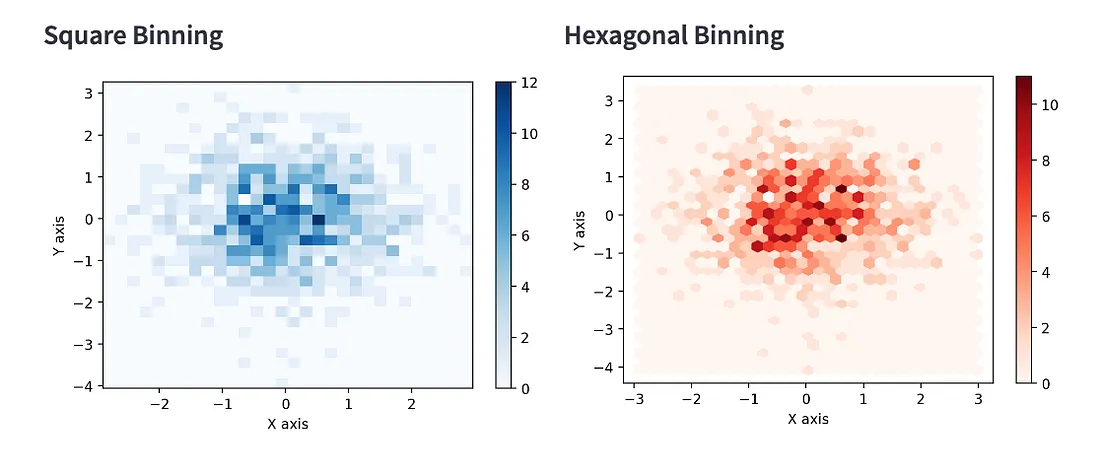)

([source](https://medium.com/@tatsurokawamoto/why-hexagons-are-better-than-squares-for-2d-histogram-plots-d3ae27b18d17))

Try to implement an hexbin (there is a function in the matplotlib.pyplot library) representing death rate (i.e. mean of DEATH_EVENT) over BMI and Ejection Fraction

Possible improvements:
- add horizontal lines dividing the plane in the standard EF categories ( < 40, 40-50, > 50)
- mark or exclude bins with very low number of patients (not particularly reliable)
- try different gridsizes (stability vs detail)
- add a second hex bin plot with only the density of data (number of records)

In [ ]:
def plot_hexbin(ax, x, y, C, reduce_C_function, gridsize, cmap, mincnt, title, ylabel, xlabel='BMI', cbar_label=''):
    im = ax.hexbin(
        x=x,
        y=y,
        C=C,
        reduce_C_function=reduce_C_function,
        gridsize=gridsize,
        cmap=cmap,
        mincnt=mincnt
    )
    fig.colorbar(im, ax=ax, label=cbar_label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    xmin, xmax = ax.get_xlim()
    for v in (40, 50):
        ax.hlines(v, xmin, xmax, linestyles='--', linewidth=1)

x, y, C = df['bmi'], df['ejection_fraction'], df['DEATH_EVENT']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

plot_hexbin(axes[0], x, y, C, np.mean, 25, 'RdYlBu', 0.5,
            'Death rate over BMI vs EF (gridsize=25)', 'Ejection Fraction (%)', cbar_label='Death rate (mean DEATH_EVENT)')

plot_hexbin(axes[1], x, y, C, np.mean, 50, 'RdYlBu', 0.5,
            'Death rate over BMI vs EF (gridsize=50)', 'Ejection Fraction (%)', cbar_label='Death rate (mean DEATH_EVENT)')

plot_hexbin(axes[2], x, y, None, None, 25, 'coolwarm', 1,
            'Data density over BMI vs EF (gridsize=25)', 'Ejection Fraction (%)', cbar_label='Number of patients (log)')

plot_hexbin(axes[3], x, y, None, None, 50, 'coolwarm', 1,
            'Data density over BMI vs EF (gridsize=50)', 'Ejection Fraction (%)', cbar_label='Number of patients (log)')


plt.tight_layout()
plt.show()

# Feedback

Please leave a feedback on this lab through [this form](https://forms.office.com/e/GSiPM7XinL) (estimated 2 minutes)